In [24]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt

In [4]:
df_orig=pd.read_excel(r'C:\Users\ekrigos\Desktop\DataS\REVA\HRAnalyics\Sentiment\SentimentAnalysis_HRExit.xls')

In [5]:
df_orig.info()
df_orig.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 8 columns):
Emp Nos                                                                                              363 non-null int64
What triggered your decision for leaving Infics                                                      363 non-null object
How likely are you to recommend the company to a friend or a family member? On a scale of 0 to 10    363 non-null int64
If 0-6 why                                                                                           64 non-null object
If 7-8 Why?                                                                                          145 non-null object
If 9-10 Why?                                                                                         143 non-null object
What is the one thing that you liked about Infics                                                    362 non-null object
What is the one thing that you would want changed in

,Emp Nos,What triggered your decision for leaving Infics,How likely are you to recommend the company to a friend or a family member? On a scale of 0 to 10,If 0-6 why,If 7-8 Why?,If 9-10 Why?,What is the one thing that you liked about Infics,What is the one thing that you would want changed in Infics
0,11111,I worked for the organization for 2 years. The...,5,The career growth also the opportunities are low.,NaN,NaN,Work Life Balance.,They should treat people equally during the Ap...
1,11112,I was working in Infics for about 4 years and ...,8,NaN,the company asks us to work on our weekend as ...,NaN,learning environment and people are approachable.,salary policy
2,11113,Better opportunity. New company closer to my h...,8,NaN,Work life balance can be managed well. Flexibl...,NaN,Work life balance,Would want manager to have experience and know...
3,11114,I was in the organization for 4 years. I was a...,10,NaN,NaN,"Infics is 100% great place to work, people in ...",Employee Friendly.,"Nothing, everything is transparent, No negativ..."
4,11115,"Overall, the experience was good. It was a lon...",5,If a person is joining for a lower level I wil...,NaN,NaN,"I liked the learning opportunities, facilities...",I want to change the managers. They just lack ...


In [6]:
df = df_orig.copy(deep = True)

In [7]:
df = df.filter(['What triggered your decision for leaving Infics'], axis = 1)

In [8]:
df.head()

,What triggered your decision for leaving Infics
0,I worked for the organization for 2 years. The...
1,I was working in Infics for about 4 years and ...
2,Better opportunity. New company closer to my h...
3,I was in the organization for 4 years. I was a...
4,"Overall, the experience was good. It was a lon..."


In [9]:
df = df.rename(columns = {"What triggered your decision for leaving Infics": "Comments"})

In [10]:
df.head()

,Comments
0,I worked for the organization for 2 years. The...
1,I was working in Infics for about 4 years and ...
2,Better opportunity. New company closer to my h...
3,I was in the organization for 4 years. I was a...
4,"Overall, the experience was good. It was a lon..."


In [11]:
def clean_text(text): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())

In [17]:
from textblob import TextBlob
import re

In [18]:
#create a empty list to store the polarity
polarity_list = []


for row_index,row in df.iterrows():
     analysis = TextBlob(clean_text(row.Comments))
     #print(row_index,analysis)
     #print("Polarity")
     Polarity = analysis.sentiment.polarity
     #print(row_index,Polarity)
     
     if (Polarity == 0.0):
        polarity_list.append('Neutral')
     elif (Polarity < 0.0):
        polarity_list.append('Negative')
     elif (Polarity > 0.0):
        polarity_list.append('Postive')
     #df['Polarity'] = analysis.sentiment.polarity

df['Polarity'] = polarity_list

In [19]:
df.head()

,Comments,Polarity
0,I worked for the organization for 2 years. The...,Negative
1,I was working in Infics for about 4 years and ...,Postive
2,Better opportunity. New company closer to my h...,Postive
3,I was in the organization for 4 years. I was a...,Postive
4,"Overall, the experience was good. It was a lon...",Postive


Postive review percentags is
85.4
Negative review percentags is
14.33
Neutral review percentags is
0.28


(-1.1066438681410877,
 1.102234436080308,
 -1.1064930286084094,
 1.100309192300351)

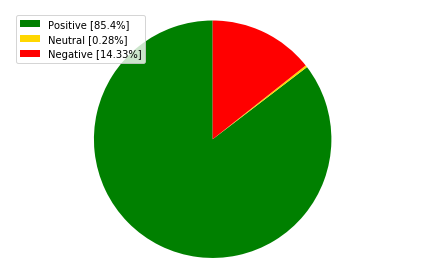

In [26]:
#check the sentiment of the tweets
total_count = len(df)
positive_df = df[df['Polarity'] == "Postive"]
positive_count = len(positive_df)
negative_df = df[df['Polarity'] == "Negative"]
negative_count = len(negative_df)
neutral_df = df[df['Polarity'] == "Neutral"]
neutral_count = len(neutral_df)

#calculate percentage of polarity
import numpy as np
print("Postive review percentags is")
positive_perc = np.round(float(positive_count)/float(total_count)*100,2)
print(positive_perc)

print("Negative review percentags is")
negative_perc = np.round(float(negative_count)/float(total_count)*100,2)
print(negative_perc)

print("Neutral review percentags is")
neutral_perc = np.round(float(neutral_count)/float(total_count)*100,2)
print(neutral_perc)

#draw pie plot
#labels = ['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]'], 'Negative [' + str(negative) + '%]']
labels = ['Positive [' + str(positive_perc) + '%]', 'Neutral [' + str(neutral_perc) + '%]', 'Negative [' + str(negative_perc) + '%]']
sizes = [positive_perc, neutral_perc, negative_perc]
colors = ['green', 'gold', 'red']
patches, text = plt.pie(sizes, colors = colors, startangle=90)
plt.legend(patches, labels, loc="best")
#plt.title("How people are reacting on" + searchTerm + " by analyzing " + str(noOfSearchTerms) + "Tweets.")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [27]:
#concat 2 dataframes

In [29]:
df1 = df.copy(deep = True)
df1 = df1.filter(['Polarity'], axis = 1)
df1.head()

,Polarity
0,Negative
1,Postive
2,Postive
3,Postive
4,Postive


In [30]:
df_all = pd.concat([df1,df_orig], axis = 1)
df_all.head()

,Polarity,Emp Nos,What triggered your decision for leaving Infics,How likely are you to recommend the company to a friend or a family member? On a scale of 0 to 10,If 0-6 why,If 7-8 Why?,If 9-10 Why?,What is the one thing that you liked about Infics,What is the one thing that you would want changed in Infics
0,Negative,11111,I worked for the organization for 2 years. The...,5,The career growth also the opportunities are low.,NaN,NaN,Work Life Balance.,They should treat people equally during the Ap...
1,Postive,11112,I was working in Infics for about 4 years and ...,8,NaN,the company asks us to work on our weekend as ...,NaN,learning environment and people are approachable.,salary policy
2,Postive,11113,Better opportunity. New company closer to my h...,8,NaN,Work life balance can be managed well. Flexibl...,NaN,Work life balance,Would want manager to have experience and know...
3,Postive,11114,I was in the organization for 4 years. I was a...,10,NaN,NaN,"Infics is 100% great place to work, people in ...",Employee Friendly.,"Nothing, everything is transparent, No negativ..."
4,Postive,11115,"Overall, the experience was good. It was a lon...",5,If a person is joining for a lower level I wil...,NaN,NaN,"I liked the learning opportunities, facilities...",I want to change the managers. They just lack ...


In [32]:
df_all.to_excel(r'C:\Users\ekrigos\Desktop\DataS\REVA\HRAnalyics\Sentiment\With_SentimentAnalysis.xls')